# EXPLORATORY DATA ANALYSIS 2

## Let's play with dissimilarity measures

### Numerical attributes

In [2]:
from scipy.spatial.distance import minkowski,euclidean,chebyshev

#manhattan distance
print(minkowski([1, 0, 0], [0, 1, 0],1))

#euclidean distance
print(euclidean([1, 0, 0], [0, 1, 0]))

#5-minkowski distance
print(minkowski([1, 0, 0], [0, 1, 0],5))

#chebyshev distance
print(chebyshev([1, 0, 0], [0, 1, 0]))
print(minkowski([1, 0, 0], [0, 1, 0],200)) ## increasing the power we should get the same result as the chebyshev distance



2.0
1.4142135623730951
1.148698354997035
1
1.0034717485095028


### Nominal attibutes

Calcolo dissimilarità tra attributi nominali:

$$
d(i,j) = \frac{p-m}{p}
$$


$$
\text{dove } m=\sum_{l=1}^{p} \delta_{i_lj_l} \space\space\text{  e con: } \space\space\delta_{i_lj_l}=1 \space\text{se}\space i_l=j_l \space\space\text{o 0 altrimenti}
$$

In [24]:
## nominal attributes
def nominal_distance(x, y):
    p = len(x)
    # zip creates an iterable of tuples where elements from 
    # the fist array are compared with the equivalent elements of the 
    # second array:
    # x = ['green','blue', 'yellow'] y = ['red','blue','yellow']
    # zip(x,y) = ('green', 'red'); ('blue', 'blue'), ('yellow', 'yellow')
    m = sum(1 if a == b else 0 for a, b in zip(x, y))
    return float(p - m) / p


x = ['green','blue','yellow']
y = ['red', 'blue', 'yellow']
nominal_distance(x, y)

0.3333333333333333

### Binary attributes

Dissimilarità per attributi binari simmetrici (0 e 1 ugualmente importanti):

| $i/j$ | 1 | 0 |
|---|---|---|
| 1    |  $q$   | $r$    |
| 0    |  $s$   | $t$    |

- $q$ attributi con 1 in entrambi gli oggetti 
- $r$ attributi con 1 nel primo oggetto e 0 nel secondo
- $s$ attributi con 0 nel primo oggetto e 1 nel secondo 
- $t$ attributi con 0 in entrambi

$$
d(i,j) = \frac{r+s}{q+r+s+t}
$$  

Dissimilarità per attributi binari assimetrici:  

**Coefficiente di Jaccard:**  

$$
J(i,j) = 1-d(i,j)= \frac{q}{q+r+s}
$$


In [7]:
v1=[1,0,1,0,0,1,0]
v2=[1,0,1,0,0,0,1]

import numpy as np
def symmetric_binary_distance(arr1, arr2):
    """
    Compute the symmetric binary distance between two binary arrays.

    Parameters:
        arr1 (array-like): The first binary array.
        arr2 (array-like): The second binary array.

    Returns:
        float: The symmetric binary distance.
    """
    # Compute the contingency table
    contingency_table = [[0, 0], [0, 0]]
    for a, b in zip(arr1, arr2):
        contingency_table[a][b] += 1

    # Compute the symmetric binary distance
    numerator = contingency_table[0][1] + contingency_table[1][0]
    denominator = sum(sum(row) for row in contingency_table)
    distance = numerator / denominator

    return distance

#symmetric binary distance
print(f'Symmetric binary distance: {symmetric_binary_distance(v1,v2)}')

#asymmetric binary distance
from scipy.spatial.distance import jaccard
print(f'Asymmetric binary distance using Jaccard: {jaccard(v1,v2)}')


Symmetric binary distance: 0.2857142857142857
Asymmetric binary distance using Jaccard: 0.5


### Ordinal attributes

In [8]:
import pandas as pd

def ordinal_to_numeric(df, mappings):
    """
    Convert ordinal string values in a DataFrame to numerical ordered values and rescale between 0 and 1 based on the number of different values in the mappings.

    Parameters:
        df (DataFrame): The pandas DataFrame containing ordinal string values.
        mappings (dict): A dictionary where keys are column names and values are dictionaries mapping ordinal string values to numerical ordered values.

    Returns:
        DataFrame: A new DataFrame with ordinal string values replaced by rescaled numerical ordered values.
    """
    # Create a copy of the DataFrame to avoid modifying the original DataFrame
    df_copy = df.copy()

    # Map ordinal string values to numerical ordered values for each column
    # .items() returns dictionary values as key:value
    for col, mapping in mappings.items():
        if col in df_copy.columns:
            # passing a dict to map is allowed and automatically swaps the values 
            # in the columns with the corresponding dict values 
            df_copy[col] = pd.to_numeric(df_copy[col].map(mapping))
            # Rescale the numerical values between 0 and 1 - normalization
            num_values = len(mapping)
            df_copy[col] = df_copy[col] / (num_values - 1)  # Rescale between 0 and 1

    return df_copy

In [9]:
data = {
    'Temperature': ['Low', 'High', 'Medium', 'Low', 'Medium'],
    'Humidity': ['Medium', 'Low', 'High', 'Low', 'Medium'],
    'Wind': ['Low', 'Absent', 'Low', 'High', 'Medium']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


,Temperature,Humidity,Wind
0,Low,Medium,Low
1,High,Low,Absent
2,Medium,High,Low
3,Low,Low,High
4,Medium,Medium,Medium


In [10]:
### Define the maps to be used in string to rank transition
map_3={'Low':0,
        'Medium':1,
        'High':2}

map_4={'Absent':0,
        'Low':1,
        'Medium':2,
        'High':3}

mappings = {'Temperature': map_3, 'Humidity': map_3, 'Wind': map_4}

# Convert ordinal string values to numerical ordered values
numeric_df = ordinal_to_numeric(df, mappings)

# Display the DataFrame with numerical ordered values
numeric_df

,Temperature,Humidity,Wind
0,0.0,0.5,0.333333
1,1.0,0.0,0.000000
2,0.5,1.0,0.333333
3,0.0,0.0,1.000000
4,0.5,0.5,0.666667


In [26]:
from scipy.spatial.distance import euclidean
## to compute dissimilarity between, e.g., record 0 and 3, we can now
## use the distance measures defined for purely numerical attributes
euclidean(numeric_df.loc[0,:].values, numeric_df.loc[3,:].values)

#numeric_df.loc[1,:].values

0.8333333333333334

### Cosine distance

In [10]:
from scipy.spatial.distance import cosine

v1=[1,0,1,0,0,1,0]
v2=[1,0,1,0,0,0,1]

print(f"Cosine distance: {cosine(v1, v2)}")
print(f"Cosine similarity: {1-cosine(v1, v2)}")


Cosine distance: 0.33333333333333337
Cosine similarity: 0.6666666666666666


In [11]:
# It is insensitive to multiplicative factors
1-cosine(v1, 3*np.array(v2))

np.float64(0.6666666666666666)

In [12]:
# It is insensitive to multiplicative factors
1-cosine(v1, 2*np.array(v1))

np.float64(1.0)

### KL-divergence

La KL Divergence $D_{KL}(p \| q)$ misura quanto $q(x)$ **è sbagliata rispetto a** $p(x)$



$$
\text{Caso discreto:}\space\space\space\space\space D_{KL}(p \| q) = \sum_{x \in X} p(x) \ln\left(\frac{p(x)}{q(x)}\right)  
$$


$$
\text{Caso continuo:}\space\space\space\space\space D_{KL}(p \| q) = \int_{-\infty}^{\infty} p(x) \ln\left(\frac{p(x)}{q(x)}\right) dx  
$$


In [27]:
# let us consider three boxes of candies and compute their
# estimated distribution (relative frequency)
# box =[P(green),P(blue),P(red),P(yellow)]
box_1 = np.array([0.25, 0.33, 0.23, 0.19])
box_2 = np.array([0.21, 0.21, 0.32, 0.26])
box_3 = np.array([0.00, 0.42, 0.32, 0.26])


import numpy as np
from scipy.special import rel_entr

# Note that is necessary to add the sum() operator on the values returned by the rel_entr
# this gives the KL-Divergence (as seen on the formula above).  
print('KL-divergence(box_1 || box_2): %.3f ' % sum(rel_entr(box_1,box_2)))
print('KL-divergence(box_2 || box_1): %.3f ' % sum(rel_entr(box_2,box_1)))
print('KL-divergence(box_1 || box_1): %.3f ' % sum(rel_entr(box_1,box_1)))

# Notice that KL-divergence is asymmetric: KL(q||p) != KL(p||q)
print('KL-divergence(box_1 || box_3): %.3f ' % sum(rel_entr(box_1,box_3)))
print('KL-divergence(box_3 || box_1): %.3f ' % sum(rel_entr(box_3,box_1)))


KL-divergence(box_1 || box_2): 0.057 
KL-divergence(box_2 || box_1): 0.056 
KL-divergence(box_1 || box_1): 0.000 
KL-divergence(box_1 || box_3): inf 
KL-divergence(box_3 || box_1): 0.289 


## Jensen-shannon divergence

In [28]:
# we consider the same setting but compute the Jansen-Shannon divergence between distributions
# JS is bound [0,ln2] 
from scipy.spatial import distance

print('JS-divergence(box_1 || box_2): %.3f ' % distance.jensenshannon(box_1,box_2))
print('JS-divergence(box_2 || box_1): %.3f ' % distance.jensenshannon(box_2,box_1))
print('JS-divergence(box_1 || box_1): %.3f ' % distance.jensenshannon(box_1,box_1))

print('\nSimmetry between order of distributions: JS(p||q) == JS(q||p):')
print('JS-divergence(box_1 || box_3): %.3f ' % distance.jensenshannon(box_1,box_3))
print('JS-divergence(box_3 || box_1): %.3f ' % distance.jensenshannon(box_3,box_1))

JS-divergence(box_1 || box_2): 0.118 
JS-divergence(box_2 || box_1): 0.118 
JS-divergence(box_1 || box_1): 0.000 

Simmetry between order of distributions: JS(p||q) == JS(q||p):
JS-divergence(box_1 || box_3): 0.309 
JS-divergence(box_3 || box_1): 0.309 


## Wasserstein distance

#### Discrete distributions

In [35]:
# suppose we have a discrete random variable that can take values 1,2,3
# and we have two discrete distributions
p1=[0.1,0.3,0.6] #p1(1),p1(2),p1(3)
p2=[0.4,0.2,0.4] #p2(1),p2(2),p2(3)

# support values of the distribution are needed when computing wasserstein between
# distributions - not needed if compraing raw data
support_values = [1,2,3]

# the wasserstein distance can be computed as
from scipy.stats import wasserstein_distance
wasserstein_distance(support_values,support_values, p1,p2)

np.float64(0.5000000000000001)

#### Continuous distributions

/var/folders/mz/2x3r_7v12sl_hfwrgd4nzpm00000gn/T/ipykernel_26471/856293275.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


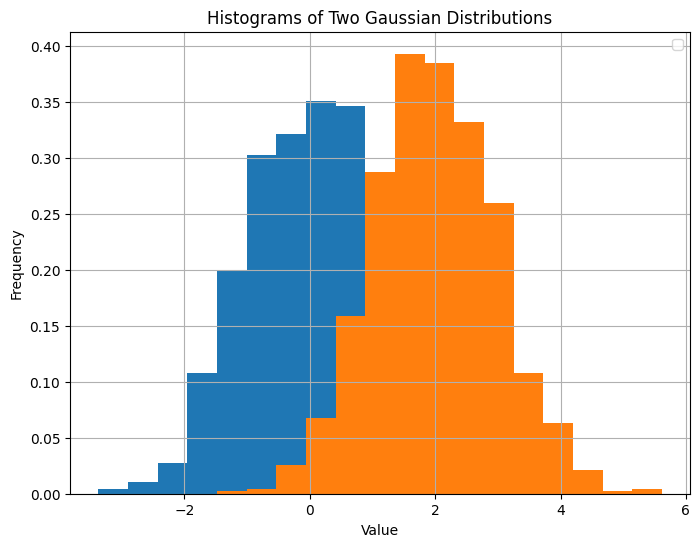

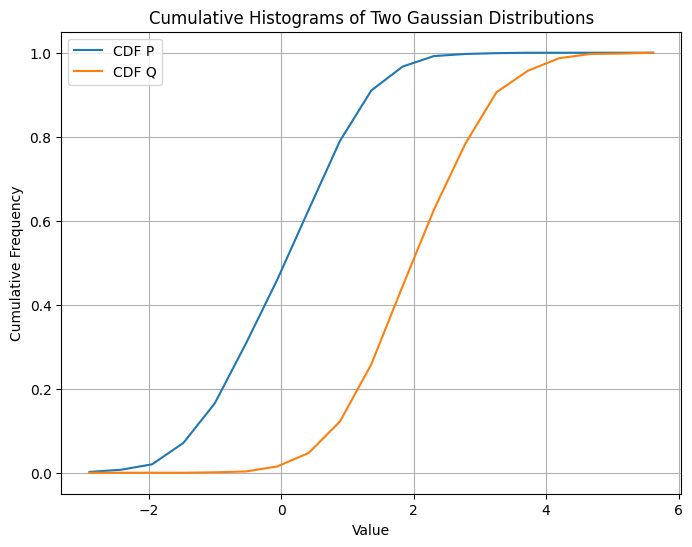

In [18]:
# for continuous distributions
import numpy as np
import matplotlib.pyplot as plt

# media e deviazione standard di p e q 
mean_p, std_p = 0, 1
mean_q, std_q = 2, 1

# Genera 1000 punti dalle due distribuzioni - campioni 
samples_p = np.random.normal(mean_p, std_p, size=1000)
samples_q = np.random.normal(mean_q, std_q, size=1000)

# Determine the bin edges for the histograms
bin_edges = np.linspace(min(samples_p.min(), samples_q.min()), max(samples_p.max(), samples_q.max()), num=20)

mean_points = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]

# Create histograms of the two distributions with the same binning
hist_p, _ = np.histogram(samples_p, bins=bin_edges, density=True)
hist_q, _ = np.histogram(samples_q, bins=bin_edges, density=True)

delta_bin=np.diff(bin_edges)[0]
# Compute cumulative histograms
cumulative_hist_p = np.cumsum(hist_p)*delta_bin
cumulative_hist_q = np.cumsum(hist_q)*delta_bin

# Plot the histograms
plt.figure(figsize=(8, 6))
plt.hist(samples_p, bins=bin_edges, density=True)
plt.hist(samples_q, bins=bin_edges, density=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Two Gaussian Distributions')
plt.legend()
plt.grid(True)
plt.show()

# Plot the cumulative histograms
plt.figure(figsize=(8, 6))
plt.plot(bin_edges[1:], cumulative_hist_p, label='CDF P')
plt.plot(bin_edges[1:], cumulative_hist_q, label='CDF Q')
plt.xlabel('Value')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Histograms of Two Gaussian Distributions')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
from scipy.stats import wasserstein_distance
# Compute the 1-Wasserstein distance using bins mean points and normalized histogram values
wasserstein_dist_from_prob_density = wasserstein_distance(mean_points, mean_points, hist_p, hist_q)

print("1-Wasserstein Distance between the histograms:", wasserstein_dist_from_prob_density)

1-Wasserstein Distance between the histograms: 1.9726881330037183


In [20]:
from scipy.stats import wasserstein_distance_nd
# Compute the 1-Wasserstein distance using discrete samples
wasserstein_dist_from_sample = wasserstein_distance_nd(samples_p, samples_q)
wasserstein_dist_from_sample
print("1-Wasserstein Distance between samples:", wasserstein_dist_from_sample)

1-Wasserstein Distance between samples: 1.9766751592033123


In [21]:
# Compute the 1-Wasserstein distance using the analitic definition of wasserstein distance in 1d
# w is integral of the absolute dfference between the cumulate density funtions (CDF) of the two distributions.
# consider using the rectangle approximation of the CDF provided by the cumulative histograms computed above.

wasserstein_from_cumulative_histograms=np.sum(np.abs(cumulative_hist_p-cumulative_hist_q))*delta_bin
print("1-Wasserstein Distance from integral approximation:", wasserstein_from_cumulative_histograms)

1-Wasserstein Distance from integral approximation: 1.9726881330037165


In [22]:
# try to compute the same distance using KL divergence
delta_bin*np.sum(rel_entr(hist_p, hist_q)), delta_bin*np.sum(rel_entr(hist_q,hist_p))

(np.float64(inf), np.float64(inf))

# Excercise:
define a function that is able to compute the similarity of records in a table having arbitrary attribute types (nominal,binary,ordinal,numeric)

In [23]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean
from IPython.display import display

def dissimilarity_matrix(df,dict_types):
    '''
    This function computes a dissimilarity matrix based on the input DataFrame df
    containing records with attributes of various types. The dissimilarity matrix
    quantifies the dissimilarity or distance between pairs of records in the DataFrame.

    Inputs:
    - df: DataFrame. Input DataFrame containing records with attributes of various types.
    - dict_types: Dictionary. A dictionary specifying the types of attributes in
                  the DataFrame columns. The keys represent column names, and the
                  values represent the types of attributes. These types determine
                  the distance function used to compute dissimilarity.
                  The types can be one of the following:
                  'NO': Nominal
                  'NU': Numerical
                  'SB': Symmetric Binary
                  'AB': Asymmetric Binary
    Returns:
    - dissimilarity_matrix: DataFrame. The computed dissimilarity matrix represented
                            as a DataFrame. The dissimilarity matrix provides pairwise
                            dissimilarity values between records in the input DataFrame.
                            The matrix is symmetric, where the element at row i and
                            column j represents the dissimilarity between record i and record j.
    '''

    num_records = df.shape[0]
    dissimilarity_matrix = np.zeros((num_records, num_records))

    # Define distance functions for different attribute types
    distance_functions = {
        'NO': nominal_distance,
        'NU': euclidean,
        'SB': symmetric_binary_distance,
        'AB': jaccard,
    }


    # Compute upper triangular part of dissimilarity matrix
    for i in range(num_records):
        print(f'Record {i}/{num_records}')

        for j in range(i+1, num_records):
            dissimilarity = 0
            num_valid_elements = 0
            for col in dict_types.keys():
                if (pd.notna(df[col].iloc[i]) and pd.notna(df[col].iloc[j])):
                    distance_func = distance_functions[dict_types[col]]
                    dissimilarity += distance_func([df[col].iloc[i]], [df[col].iloc[j]])
                    if dict_types[col]!='AB' or (df[col].iloc[i]==1 or df[col].iloc[j]==1):
                        num_valid_elements += 1
            if num_valid_elements > 0:
                dissimilarity_matrix[i, j] = dissimilarity / num_valid_elements  # Take the mean dissimilarity
            else:
                dissimilarity_matrix[i, j] = np.nan

    # Mirror upper triangular part to obtain complete symmetric matrix
    dissimilarity_matrix += dissimilarity_matrix.T - np.diag(dissimilarity_matrix.diagonal())

    return pd.DataFrame(dissimilarity_matrix, index=df.index, columns=df.index)

In [27]:
from joblib import Parallel, delayed
import itertools
def parallel_dissimilarity_matrix(df,dict_types):
    '''
    This function computes a dissimilarity matrix based on the input DataFrame df
    containing records with attributes of various types. The dissimilarity matrix
    quantifies the dissimilarity or distance between pairs of records in the DataFrame.

    Inputs:
    - df: DataFrame. Input DataFrame containing records with attributes of various types.
    - dict_types: Dictionary. A dictionary specifying the types of attributes in
                  the DataFrame columns. The keys represent column names, and the
                  values represent the types of attributes. These types determine
                  the distance function used to compute dissimilarity.
                  The types can be one of the following:
                  'NO': Nominal
                  'NU': Numerical
                  'SB': Symmetric Binary
                  'AB': Asymmetric Binary
    Returns:
    - dissimilarity_matrix: DataFrame. The computed dissimilarity matrix represented
                            as a DataFrame. The dissimilarity matrix provides pairwise
                            dissimilarity values between records in the input DataFrame.
                            The matrix is symmetric, where the element at row i and
                            column j represents the dissimilarity between record i and record j.
    '''

    num_records = df.shape[0]
    dissimilarity_matrix = np.zeros((num_records, num_records))

    # Define distance functions for different attribute types
    distance_functions = {
        'NO': nominal_distance,
        'NU': euclidean,
        'SB': symmetric_binary_distance,
        'AB': jaccard,
    }

    # Pre-extract data as arrays for faster indexing 
    data = {}
    for col, _ in dict_types.items():
        data[col] = df[col].values 

    def compute_dissimilarity(i, j):
        dissimilarity = 0.0
        num_valid_elements = 0
        for col, coltype in dict_types.items():
            val_i = data[col][i]
            val_j = data[col][j]
            # Check NaN
            if pd.notna(val_i) and pd.notna(val_j):
                distance_func = distance_functions[coltype]
                dissimilarity += distance_func([val_i], [val_j])
                
                # For AB, only count if at least one of them is 1
                if not (coltype == 'AB' and (val_i == 0 and val_j == 0)):
                    num_valid_elements += 1

        # Average out the dissimilarities for valid elements only
        if num_valid_elements > 0:
            return dissimilarity / num_valid_elements
        else:
            return np.nan

    # Create all i<j pairs
    upper_tri_pairs = [(i, j) for i in range(num_records - 1) 
                                 for j in range(i + 1, num_records)]

    # Compute in parallel
    results = Parallel(n_jobs=-1)(
        delayed(compute_dissimilarity)(i, j) for (i, j) in upper_tri_pairs
    )

    # Fill the matrix symmetrically
    for (i, j), val in zip(upper_tri_pairs, results):
        dissimilarity_matrix[i, j] = val
        dissimilarity_matrix[j, i] = val

    # Set the diagonal to zero (if you want it explicitly)
    np.fill_diagonal(dissimilarity_matrix, 0.0)


    return pd.DataFrame(dissimilarity_matrix, index=df.index, columns=df.index)


## Load Titanic dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/path') ###change path


In [59]:
df=pd.read_csv('train.csv') ##change path
# Define bins and labels for age groups
bins = [0, 14, 24, 54, float('inf')]
labels = ['Children', 'Young', 'Middle', 'Seniors']

# Add a new column 'Age_Group' containing ordinal categories
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


features_to_consider=['Survived',	'Pclass', 'Sex',	'Age_Group',	'SibSp',	'Parch', 'Fare', 'Embarked']
df=df[features_to_consider]
df.head(20)

,Survived,Pclass,Sex,Age_Group,SibSp,Parch,Fare,Embarked
0,0,3,male,Young,1,0,7.2500,S
1,1,1,female,Middle,1,0,71.2833,C
2,1,3,female,Middle,0,0,7.9250,S
3,1,1,female,Middle,1,0,53.1000,S
4,0,3,male,Middle,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,Seniors,0,0,51.8625,S
7,0,3,male,Children,3,1,21.0750,S
8,1,3,female,Middle,0,2,11.1333,S
9,1,2,female,Young,1,0,30.0708,C


### Excercise
* prepare data to compute similarity between different records
* compute dissimilarity matrix considering the first 100 records
* find the 10 records more similar to the first two passengers (index=0, index=1)
* compute the distance between the distributions of ticket fares in the Male and Female population. 